In [1]:
!pip install kmodes

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN
import folium
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium matplotlib
!pip install geopy
from geopy.geocoders import Nominatim

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Target Upcurve/Project/DC_Planning.csv')
df['latitude'] = df['geographic_loc'].str.extract(r'\((.*?),')[0].astype(float)
df['longitude'] = df['geographic_loc'].str.extract(r',(.*)\)', expand=False).astype(float)
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country,latitude,longitude
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States,41.934523,-114.793454
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States,28.411406,-98.053030
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States,37.861983,-79.324797
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States,33.101184,-115.570116
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada,49.022389,-123.155575


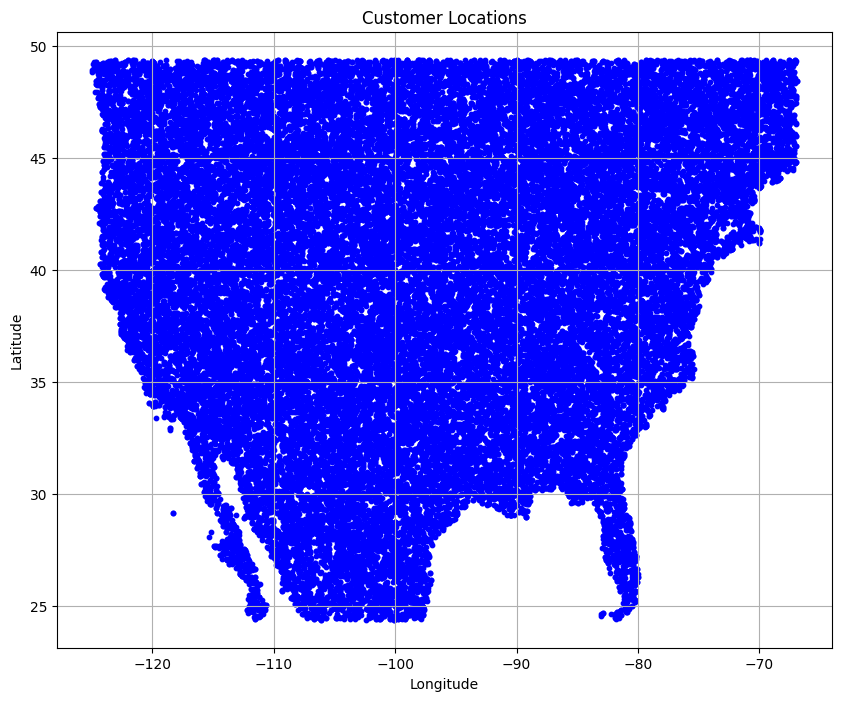

In [12]:
import matplotlib.pyplot as plt

# Assuming you have the customer data in a DataFrame named 'df'
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], s=10, c='b', marker='o')
plt.title('Customer Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [21]:
epsilon = 0.5
min_samples = 10
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
features = ['latitude', 'longitude']
# Fit the DBSCAN model using the combined feature
dbscan.fit(df[['latitude','longitude']])

# Extract cluster labels
cluster_labels = dbscan.labels_

# Add the cluster labels to your DataFrame
df['cluster'] = cluster_labels

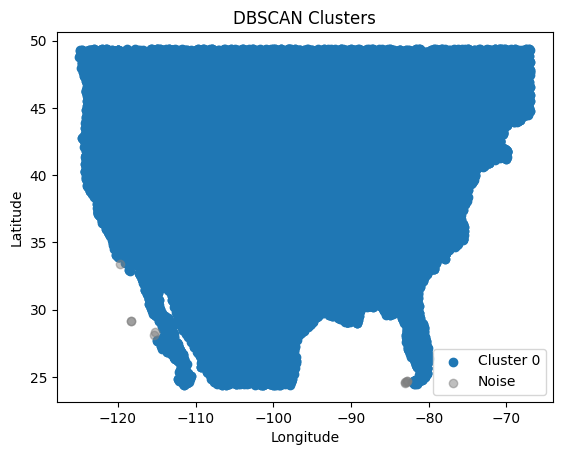

In [22]:
import matplotlib.pyplot as plt

# Assuming you have already run the code to fit DBSCAN and added cluster labels to your DataFrame

# Get unique cluster labels (excluding noise, labeled as -1)
unique_labels = np.unique(cluster_labels)
unique_labels = unique_labels[unique_labels != -1]

# Plot each cluster with a different color
for label in unique_labels:
    cluster_data = df[df['cluster'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}')

# Plot noise points (if any)
noise_data = df[df['cluster'] == -1]
if not noise_data.empty:
    plt.scatter(noise_data['longitude'], noise_data['latitude'], label='Noise', color='gray', alpha=0.5)

plt.title('DBSCAN Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import silhouette_score
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]  # Adjust the epsilon values you want to consider
min_samples_values = [5, 10, 15]  # Adjust the min_samples values you want to consider

best_eps = None
best_min_samples = None
best_silhouette_score = -1
X = df[['latitude','longitude']]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)

        # Silhouette score
        if len(set(cluster_labels)) > 1:  # Silhouette score requires at least 2 clusters
            silhouette_avg = silhouette_score(X, cluster_labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette_score}")

Best eps: 0.5, Best min_samples: 10, Best Silhouette Score: 0.1890257637831121


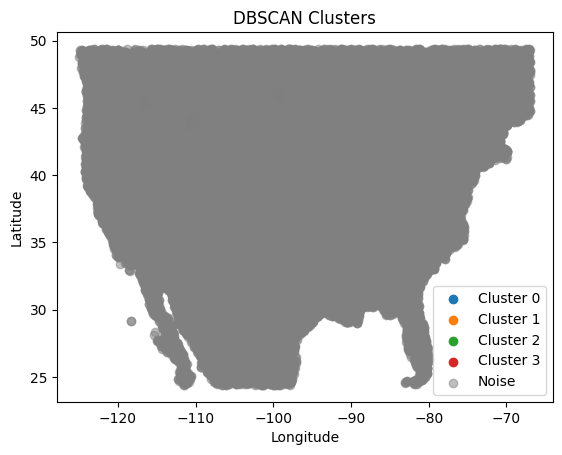

In [23]:
epsilon = 0.5
min_samples = 10
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
features = ['latitude', 'longitude']
scaler = StandardScaler()
numerical_cols = ['order_frequency', 'returns_rate']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Fit the DBSCAN model using the combined feature
dbscan.fit(df[['latitude','longitude','order_frequency','returns_rate']])

# Extract cluster labels
cluster_labels = dbscan.labels_

# Add the cluster labels to your DataFrame
df['cluster'] = cluster_labels

# Get unique cluster labels (excluding noise, labeled as -1)
unique_labels = np.unique(cluster_labels)
unique_labels = unique_labels[unique_labels != -1]

# Plot each cluster with a different color
for label in unique_labels:
    cluster_data = df[df['cluster'] == label]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {label}')

# Plot noise points (if any)
noise_data = df[df['cluster'] == -1]
if not noise_data.empty:
    plt.scatter(noise_data['longitude'], noise_data['latitude'], label='Noise', color='gray', alpha=0.5)

plt.title('DBSCAN Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [20]:
# Assuming 'df' is your DataFrame
correlation_matrix = df[['latitude', 'longitude', 'order_frequency', 'returns_rate']].corr()
print(correlation_matrix)


                 latitude  longitude  order_frequency  returns_rate
latitude         1.000000   0.113244        -0.000070     -0.009025
longitude        0.113244   1.000000        -0.003053      0.001576
order_frequency -0.000070  -0.003053         1.000000     -0.004439
returns_rate    -0.009025   0.001576        -0.004439      1.000000


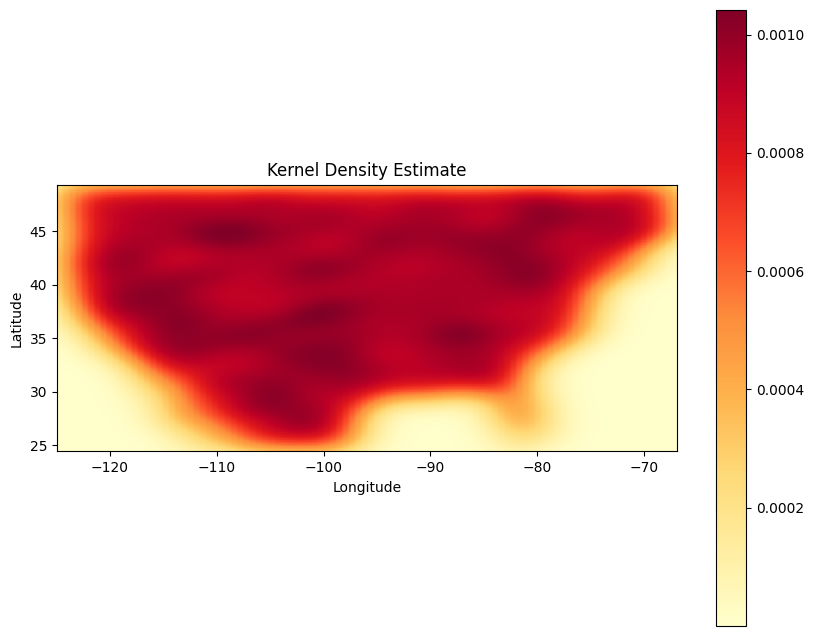

In [13]:
from scipy.stats import gaussian_kde

x, y = df['longitude'], df['latitude']
kde = gaussian_kde(np.vstack([x, y]))
x_grid, y_grid = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
density = np.reshape(kde(positions).T, x_grid.shape)

plt.figure(figsize=(10, 8))
plt.imshow(np.rot90(density), cmap='YlOrRd', extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.title('Kernel Density Estimate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
